# Geopandas



### Attawut Nardkulpat, Reseach Officer, Burapha University
### Reference: https://github.com/jorisvandenbossche/geopandas-tutorial
### attawut@buu.ac.th
### 09/11/2021

---------------------------------------------------------------

# Part 1 Introduction to geospatial vector data in Python

## Install Geopandas

In [ ]:
!pip install geopandas

In [ ]:
conda install -c conda-forge geopandas

## Import Geopandas

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## Importing geospatial data
Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats (relying on the fiona library under the hood, which is an interface to GDAL/OGR), using the geopandas.read_file function.

In [2]:
countries = gpd.read_file("data/ne_110m_admin_0_countries.shp")

<AxesSubplot:>

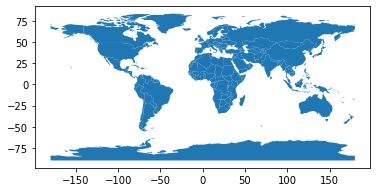

In [3]:
countries.plot()

## Example 1
สร้างตัวแปร BUU_point, BUU_line และ BUU_polygon และแสดงผลข้อมูล

In [5]:
BUU_point = gpd.read_file("data/Building_BUU_point_wgs84.shp")
BUU_line = gpd.read_file("data/Road_BUU_wgs84.shp")
BUU_polygon = gpd.read_file("data/Boundary_BUU_wgs84.shp")

<AxesSubplot:>

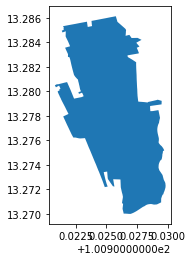

In [9]:
BUU_polygon.plot()

ดูตารางของแต่ข้อมูล

In [ ]:
#BUU_point.head()
#BUU_line.head()
#BUU_polygon.head()

----------------------

 ## GeoDataFrame

In [ ]:
type(countries)

In [ ]:
countries.geometry

In [ ]:
type(countries.geometry)

In [ ]:
countries.geometry.area

In [ ]:
countries['POP_EST'].mean()

In [ ]:
africa = countries[countries['CONTINENT'] == 'Africa']

## Example 2

หาค่าเฉลี่ยของพื้นที่อาคาร

In [ ]:
#gdf_point['Area'].mean()

ทำการเลือกเฉพาะข้อมูลถนนใน column fclass = residential

In [ ]:
#gdf_line_residential = gdf_line[gdf_line['fclass'] == 'residential']

## Geometries: Points, Linestrings and Polygons

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

![](img/simple_features_3_text.svg)

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.

In [10]:
print(countries.geometry[2])

POLYGON ((-8.665589565454809 27.65642588959236, -8.665124477564191 27.58947907155823, -8.684399786809053 27.39574412689601, -8.6872936670174 25.88105621998891, -11.96941891117116 25.93335276946827, -11.93722449385332 23.37459422453617, -12.87422156416958 23.28483226164518, -13.11875444177471 22.77122020109626, -12.92910193526353 21.32707062426756, -16.84519365077399 21.33332347257488, -17.06342322434257 20.99975210213083, -17.02042843267577 21.42231028898158, -17.00296179856109 21.42073415779658, -14.75095455571353 21.50060008390366, -14.63083268885107 21.8609398462749, -14.22116777185725 22.31016307218816, -13.89111039880905 23.6910090194593, -12.50096269372537 24.7701162785782, -12.03075883630163 26.03086619720307, -11.71821977380036 26.10409170176062, -11.39255489749701 26.88342397715439, -10.55126257978527 26.99080760345689, -10.18942420087758 26.86094472910741, -9.735343390328879 26.86094472910741, -9.41303748212448 27.08847606048857, -8.794883999049077 27.12069631602251, -8.81782

In [11]:
type(countries.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

In [12]:
countries.area

0         1.639511
1        76.301964
2         8.603984
3      1712.995228
4      1122.281921
          ...     
172       8.604719
173       1.479321
174       1.231641
175       0.639000
176      51.196106
Length: 177, dtype: float64

## Example 3
เช็ค Geometry ข้อมูล

## Plotting our different layers together

<AxesSubplot:>

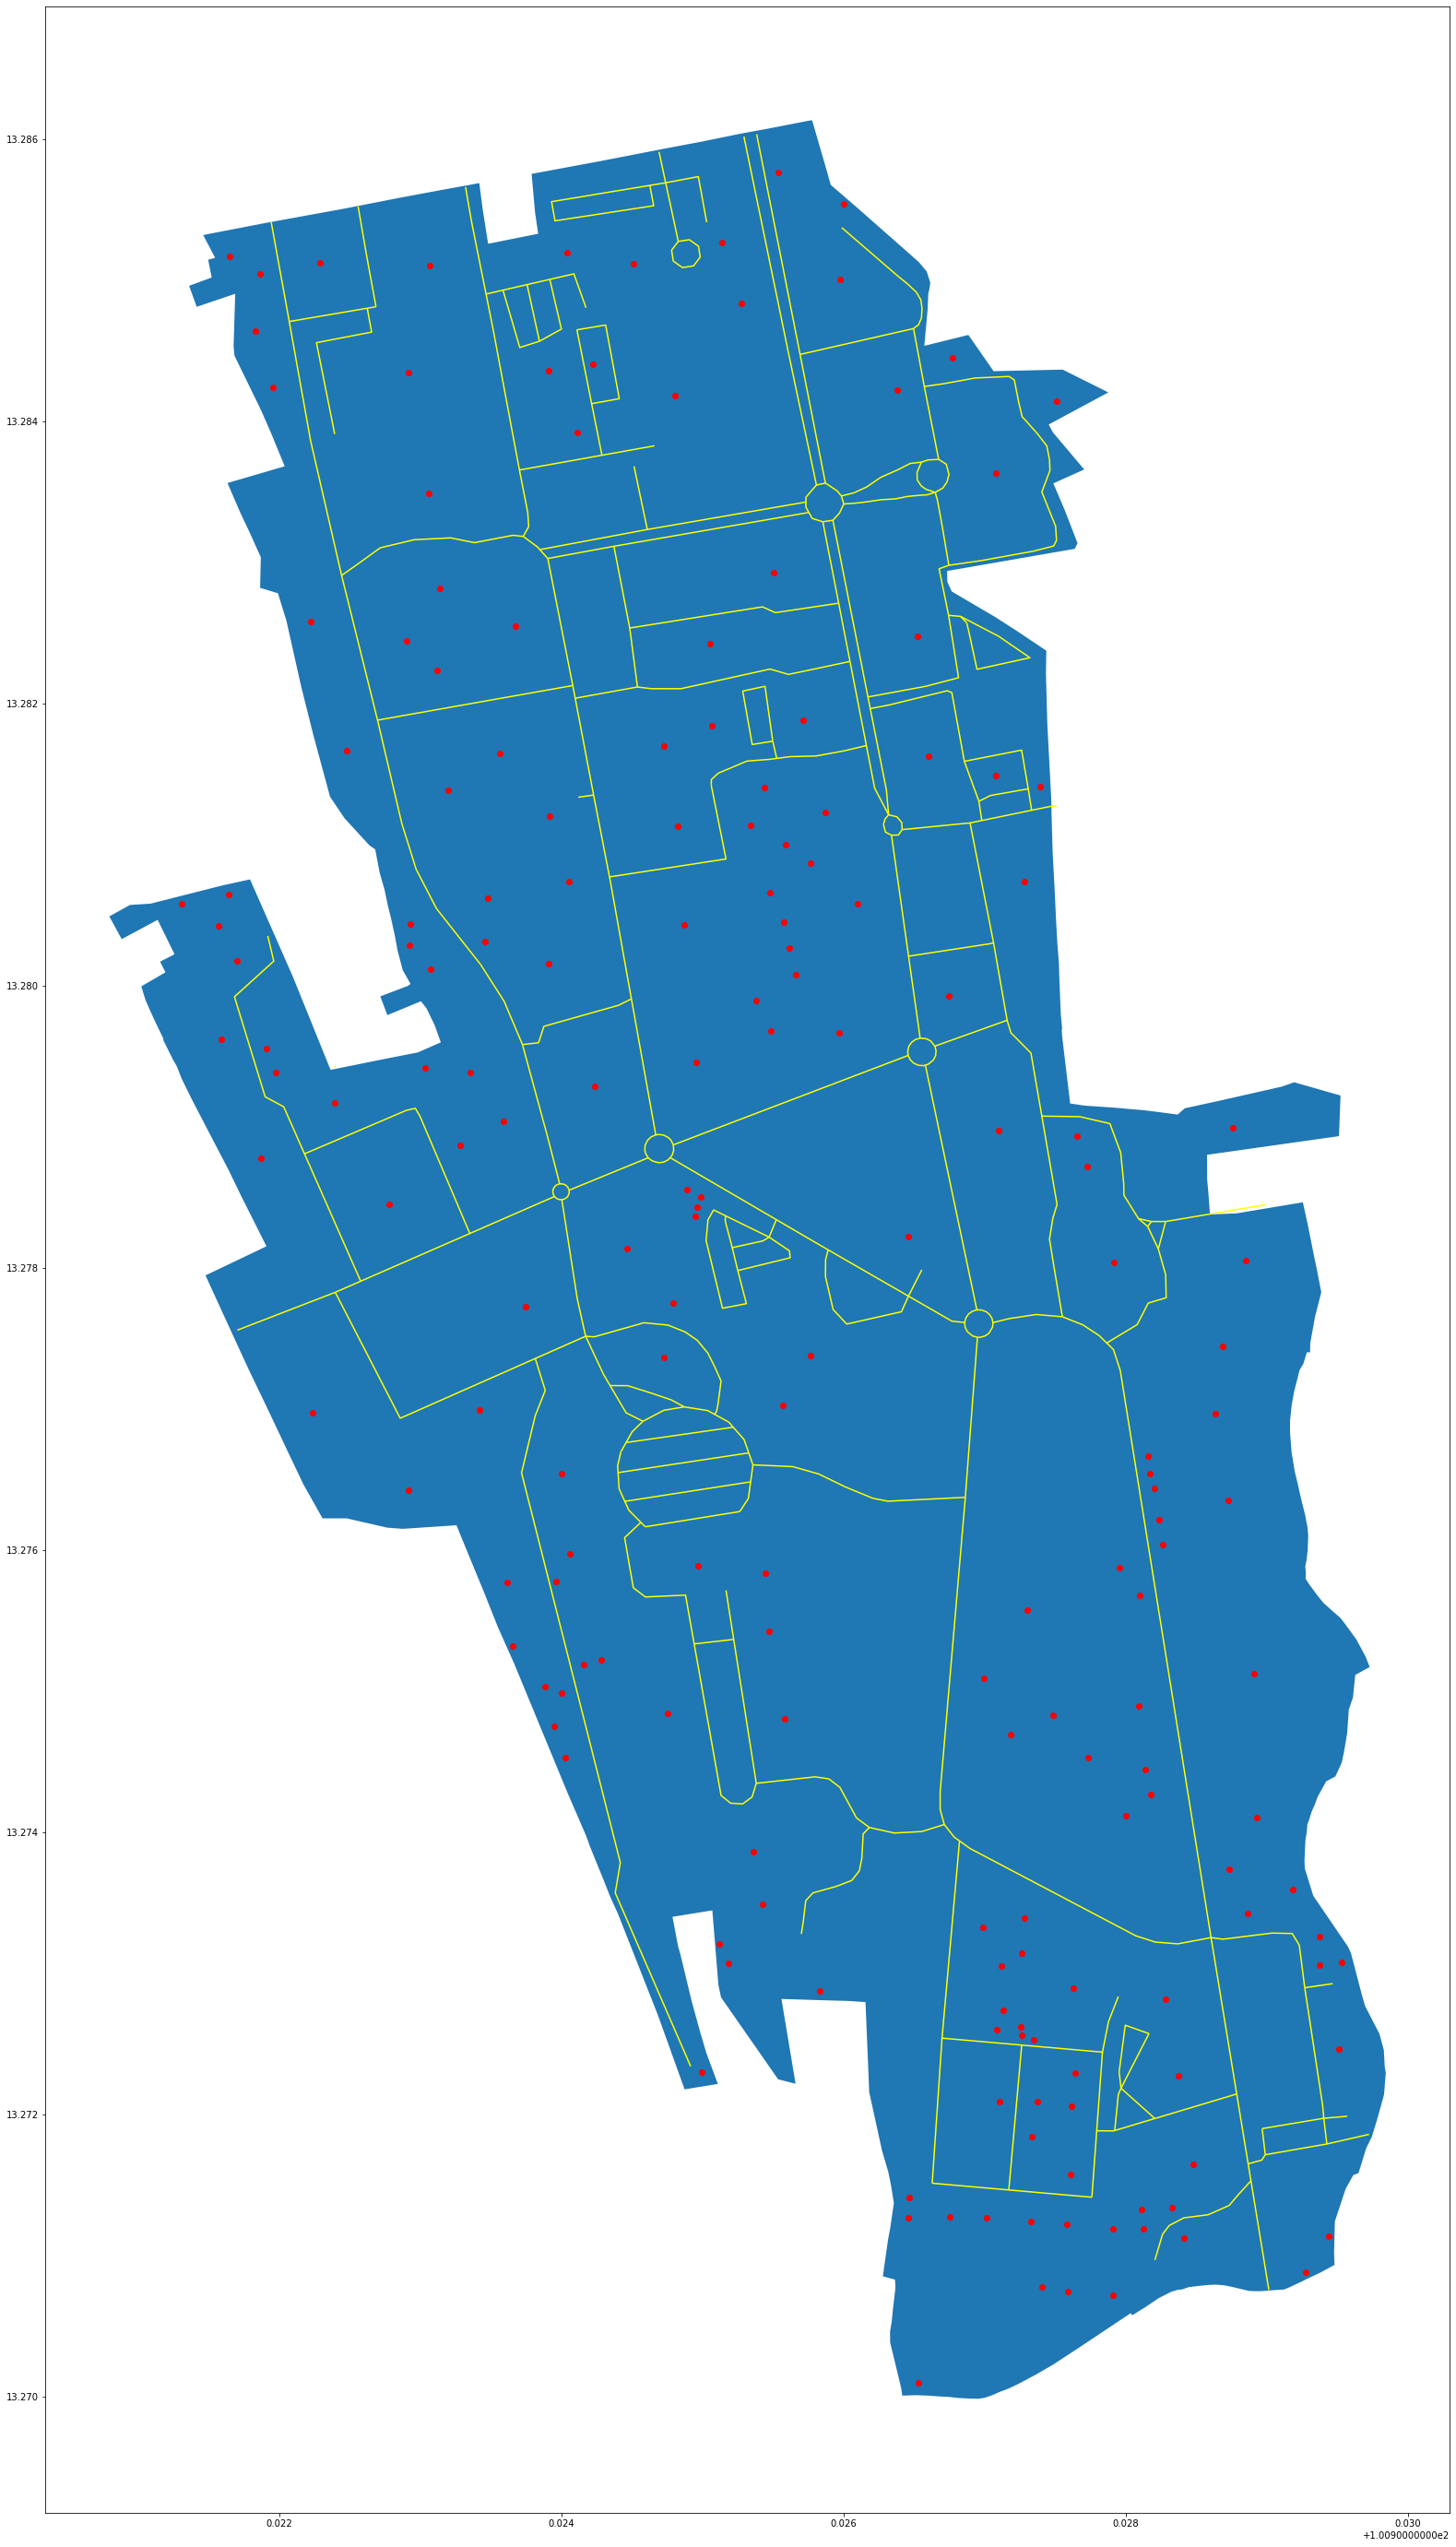

In [24]:
ax = BUU_polygon.plot(figsize=(50, 50))
BUU_point.plot(ax=ax, color='red')
BUU_line.plot(ax=ax,color='yellow')

-----------

# Part 2 Coordinate reference systems

### Projected coordinates

> `(x, y)` coordinates are usually in meters or feet

![](img/projection.png)

<table><tr>
<td> <img src="img/projections-AlbersEqualArea.png"/> </td>
<td> <img src="img/projections-Mercator.png"/> </td>
</tr>
<tr>
<td> <img src="img/projections-Robinson.png"/> </td>
</tr></table>

**Projected size vs actual size (Mercator projection)**:

![](img/mercator_projection_area.gif)

## Coordinate Reference Systems in Python / GeoPandas

The `.crs` attribute is given as a dictionary. In this case, it only indicates the EPSG code, but it can also contain the full "proj4" string (in dictionary form).

Possible CRS representation:

- **`proj4` string**  
  
  Example: `+proj=longlat +datum=WGS84 +no_defs`

  Or its dict representation: `{'proj': 'longlat', 'datum': 'WGS84', 'no_defs': True}`

- **EPSG code**
  
  Example: `EPSG:4326` = WGS84 geographic CRS (longitude, latitude)
  
- Well-Know-Text (WKT) representation (better support coming with PROJ6 in the next GeoPandas version)

See eg https://epsg.io/4326

Under the hood, GeoPandas uses the `pyproj` / `PROJ` libraries to deal with the re-projections.

For more information, see also http://geopandas.readthedocs.io/en/latest/projections.html.

In [25]:
countries.crs

{'init': 'epsg:4326'}

<AxesSubplot:>

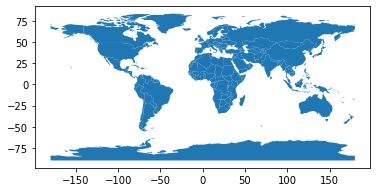

In [26]:
countries.plot()

## Example 4
เช็ค Coordinate Reference System ของข้อมูล

## Transforming to another CRS

In [28]:
# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['NAME'] != "Antarctica")]

In [31]:
countries_mercator = countries.to_crs({'init': 'epsg:3395'})

RuntimeError: b'no arguments in initialization list'

In [ ]:
countries_mercator.plot()

## Example 4
แปลงระบบพิกัดของข้อมูลจาก WGS84 Geographic Coordinate เป็น WGS84 UTM Zone 47N

----------------

# Part 3 Spatial relationships and operations

In [32]:
countries = gpd.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = gpd.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = gpd.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

## Spatial relationships

![](img/TopologicSpatialRelarions2.png)

(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))

### Relationships between individual objects

A polygon <small>(note: we use `.squeeze()` here to to extract the scalar geometry object from the GeoSeries of length 1)</small>:

In [33]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].squeeze()

In [36]:
#2 Points
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].squeeze()

In [39]:
from shapely.geometry import LineString
line = LineString([paris, brussels])

<AxesSubplot:>

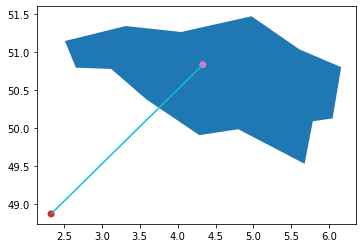

In [42]:
gpd.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

In [43]:
brussels.within(belgium)

True

In [44]:
belgium.contains(brussels)

True

In [45]:
belgium.contains(paris)

False

In [46]:
paris.within(belgium)

False

In [47]:
belgium.contains(line)

False

In [48]:
line.intersects(belgium)

True

## Example 5
เช็คความสัมพันธ์ของข้อมูล

## Spatial operations

**Binary operations:**

<table><tr>
<td> <img src="img/spatial-operations-base.png"/> </td>
<td> <img src="img/spatial-operations-intersection.png"/> </td>
</tr>
<tr>
<td> <img src="img/spatial-operations-union.png"/> </td>
<td> <img src="img/spatial-operations-difference.png"/> </td>
</tr></table>

**Buffer:**

<table><tr>
<td> <img src="img/spatial-operations-buffer-point1.png"/> </td>
<td> <img src="img/spatial-operations-buffer-point2.png"/> </td>
</tr>
<tr>
<td> <img src="img/spatial-operations-buffer-line.png"/> </td>
<td> <img src="img/spatial-operations-buffer-polygon.png"/> </td>
</tr></table>


See https://shapely.readthedocs.io/en/stable/manual.html#spatial-analysis-methods for more details.

### Buffer

<AxesSubplot:>

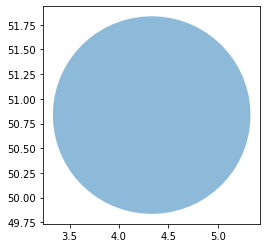

In [56]:
gpd.GeoSeries([brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10')

<AxesSubplot:>

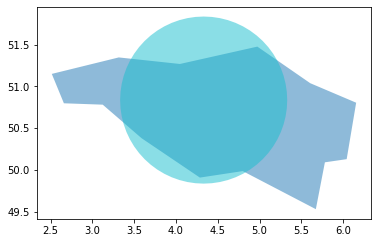

In [50]:
gpd.GeoSeries([belgium, brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10')

### Intersection

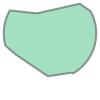

In [51]:
brussels.buffer(1).intersection(belgium)

### union

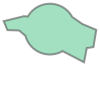

In [52]:
brussels.buffer(1).union(belgium)

### difference

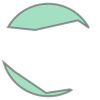

In [53]:
brussels.buffer(1).difference(belgium)

## Example 6
Spatial Analysis

-----------

# Part 4 Spatial joins

In [57]:
cities2 = cities[cities['name'].isin(['Bern', 'Brussels', 'London', 'Paris'])].copy()
cities2['iso_a3'] = ['CHE', 'BEL', 'GBR', 'FRA']

In [58]:
cities2

,name,geometry,iso_a3
26,Bern,POINT (7.46698 46.91668),CHE
170,Brussels,POINT (4.33137 50.83526),BEL
219,London,POINT (-0.11867 51.50194),GBR
235,Paris,POINT (2.33139 48.86864),FRA


In [59]:
countries2 = countries[['iso_a3', 'name', 'continent']]
countries2.head()

,iso_a3,name,continent
0,AFG,Afghanistan,Asia
1,AGO,Angola,Africa
2,ALB,Albania,Europe
3,ARE,United Arab Emirates,Asia
4,ARG,Argentina,South America


In [60]:
cities2.merge(countries2, on='iso_a3')

,name_x,geometry,iso_a3,name_y,continent
0,Bern,POINT (7.46698 46.91668),CHE,Switzerland,Europe
1,Brussels,POINT (4.33137 50.83526),BEL,Belgium,Europe
2,London,POINT (-0.11867 51.50194),GBR,United Kingdom,Europe
3,Paris,POINT (2.33139 48.86864),FRA,France,Europe


## Recap - spatial relationships between objects

In [61]:
france = countries.loc[countries['name'] == 'France', 'geometry'].squeeze()

In [62]:
cities.within(france)

0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239    False
240    False
241    False
242    False
Length: 243, dtype: bool

In [63]:
cities[cities.within(france)]

,name,geometry
10,Monaco,POINT (7.40691 43.73965)
13,Andorra,POINT (1.51649 42.50000)
186,Geneva,POINT (6.14003 46.21001)
235,Paris,POINT (2.33139 48.86864)


## Spatial join operation

<div class="alert alert-info" style="font-size:120%">
    
**SPATIAL JOIN** = *transferring attributes from one layer to another based on their spatial relationship* <br>
​
​
Different parts of this operations:
​
* The GeoDataFrame to which we want add information
* The GeoDataFrame that contains the information we want to add
* The spatial relationship we want to use to match both datasets ('intersects', 'contains', 'within')
* The type of join: left or inner join
​
​
![](img/illustration-spatial-join.svg)
​
</div>

In [65]:
joined = gpd.sjoin(cities, countries, op='within', how='left')

In [69]:
joined

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),79.0,ITA,Italy,Europe,6.213780e+07,2221000.0
1,San Marino,POINT (12.44177 43.93610),79.0,ITA,Italy,Europe,6.213780e+07,2221000.0
2,Vaduz,POINT (9.51667 47.13372),9.0,AUT,Austria,Europe,8.754413e+06,416600.0
3,Lobamba,POINT (31.20000 -26.46667),152.0,SWZ,Swaziland,Africa,1.467152e+06,11060.0
4,Luxembourg,POINT (6.13000 49.61166),97.0,LUX,Luxembourg,Europe,5.941300e+05,58740.0
...,...,...,...,...,...,...,...,...
238,Rio de Janeiro,POINT (-43.22697 -22.92308),22.0,BRA,Brazil,South America,2.073534e+08,3081000.0
239,São Paulo,POINT (-46.62697 -23.55673),22.0,BRA,Brazil,South America,2.073534e+08,3081000.0
240,Sydney,POINT (151.18323 -33.91807),8.0,AUS,Australia,Oceania,2.323241e+07,1189000.0
241,Singapore,POINT (103.85387 1.29498),111.0,MYS,Malaysia,Asia,3.138199e+07,863000.0


In [67]:
joined['continent'].value_counts()

Asia             59
Africa           57
Europe           46
North America    26
South America    14
Oceania           8
Name: continent, dtype: int64

## Example 7
Spatial Join

## The overlay operation

In [70]:
africa = countries[countries['continent'] == 'Africa']

<AxesSubplot:>

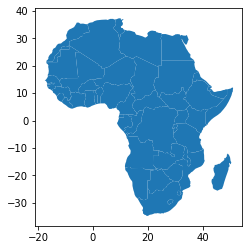

In [71]:
africa.plot()

In [72]:
cities['geometry'] = cities.buffer(2)

<AxesSubplot:>

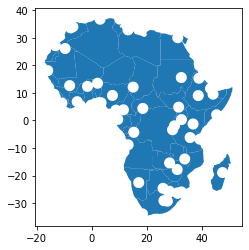

In [74]:
gpd.overlay(africa, cities, how='difference').plot()

## Example 8
Overlay